(**Click the icon below to open this notebook in Colab**)

[![Open InColab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/machine-learning-for-actuarial-science/blob/main/2025-spring/week08/notebook/demo.ipynb)

In [ ]:
%%sh

ls -l work/2025-spring/week08/

# Recap of Last Class

## Example - `prophet`

Prophet is an enhanced statistical tool because it extends traditional time series models with automated trend and seasonality detection, making it user-friendly and effective for business applications.

## Key Differences Between Holiday Effect and Seasonality  

| Feature            | Seasonality  | Holiday Effect |
|--------------------|-------------|---------------|
| **Definition**     | A **repeating pattern** that occurs at a fixed frequency (e.g., daily, weekly, yearly). | An impact on the time series caused by specific holidays or events. |
| **Regularity**     | **Strictly periodic** (e.g., weekly sales cycles, annual weather patterns). | **Not necessarily periodic** (holidays can fall on different weekdays each year). |
| **Examples**       | Increased ice cream sales in summer (yearly seasonality). Higher website traffic on weekends (weekly seasonality). | Lower stock market activity on Christmas. Higher online sales on Black Friday. |
| **Modeling in Prophet** | Modeled using a **Fourier series** to capture repeating cycles. | Modeled using **dummy variables** for specific dates, allowing deviations from normal patterns. |


In [2]:
import pandas as pd
from prophet import Prophet

playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [3]:
holidays

,holiday,ds,lower_window,upper_window
0,playoff,2008-01-13,0,1
1,playoff,2009-01-03,0,1
2,playoff,2010-01-16,0,1
3,playoff,2010-01-24,0,1
4,playoff,2010-02-07,0,1
5,playoff,2011-01-08,0,1
6,playoff,2013-01-12,0,1
7,playoff,2014-01-12,0,1
8,playoff,2014-01-19,0,1
9,playoff,2014-02-02,0,1


The time series of the log daily page views for the Wikipedia page for Peyton Manning is used here
- https://facebook.github.io/prophet/docs/quick_start.html

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [6]:
m = Prophet(holidays=holidays)
m.fit(df)

future = m.make_future_dataframe(periods=365)
future.tail()

01:02:54 - cmdstanpy - INFO - Chain [1] start processing
01:02:55 - cmdstanpy - INFO - Chain [1] done processing


,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [11]:
forecast = m.predict(future)
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

# forecast.head(3)

,ds,playoff,superbowl
2190,2014-02-02,1.217847,1.200633
2191,2014-02-03,1.898839,1.455819
2532,2015-01-11,1.217847,0.000000
2533,2015-01-12,1.898839,0.000000
2901,2016-01-17,1.217847,0.000000
2902,2016-01-18,1.898839,0.000000
2908,2016-01-24,1.217847,0.000000
2909,2016-01-25,1.898839,0.000000
2922,2016-02-07,1.217847,1.200633
2923,2016-02-08,1.898839,1.455819


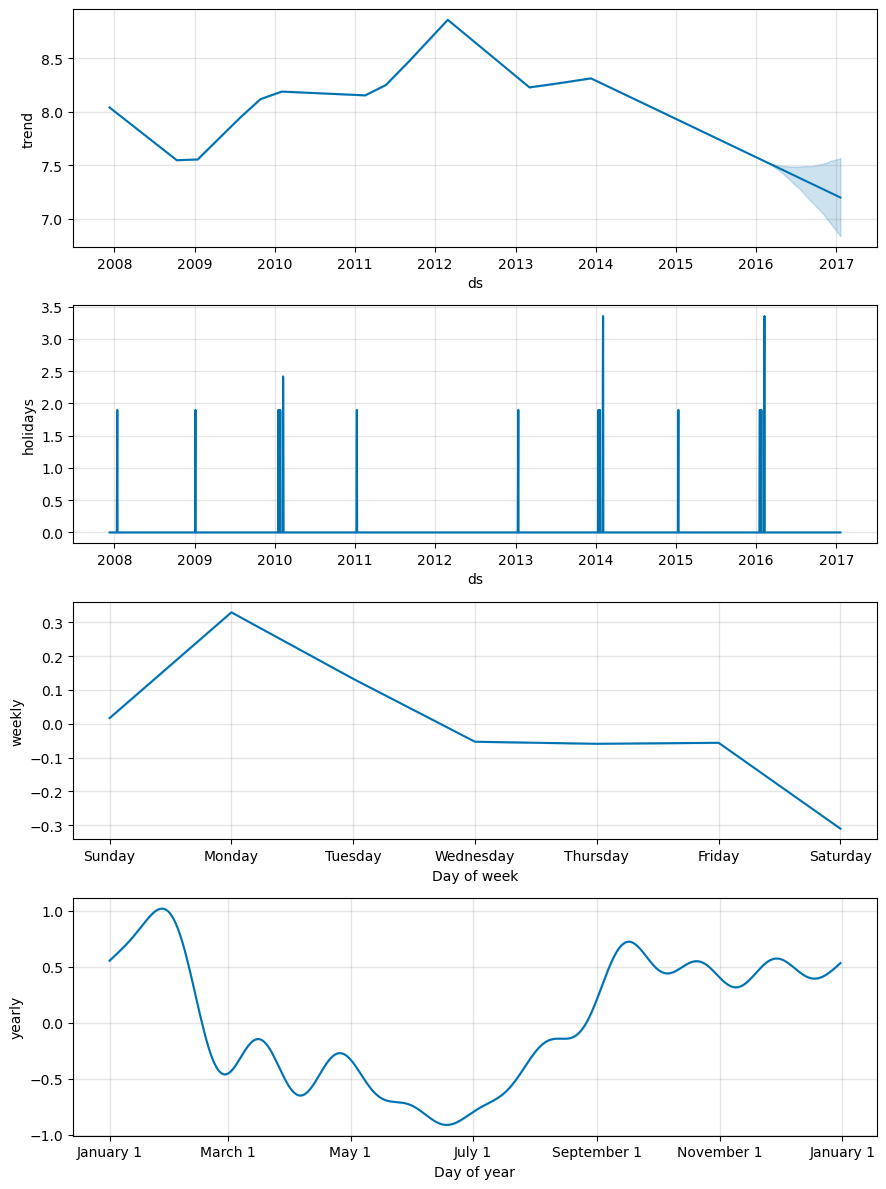

In [12]:
fig = m.plot_components(forecast)

## Example - `LSTM`

### Train the LSTM model

In [14]:
import matplotlib.pyplot as plt
import yfinance as yf

stock_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2025-01-31'

# Download historical data
df_aapl = yf.download(stock_symbol, start=start_date, end=end_date).Close.reset_index()
df_aapl.set_index('Date', inplace=True)
df_aapl.columns = ['Close']
df_aapl.head(10)

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2020-01-02,72.716087
2020-01-03,72.009125
2020-01-06,72.582909
2020-01-07,72.241554
2020-01-08,73.403633
2020-01-09,74.962791
2020-01-10,75.132278
2020-01-13,76.737434
2020-01-14,75.701210


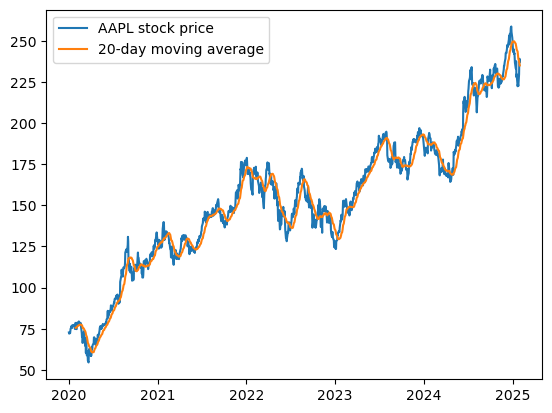

In [15]:
plt.plot(df_aapl.Close, label='AAPL stock price')
plt.plot(df_aapl.Close.rolling(20).mean(), label='20-day moving average')
plt.legend()
plt.show()

In [16]:
dataset_train = df_aapl.loc[:"2024-12-31", :].copy()
dataset_train.tail(3)

,Close
Date,
2024-12-27,255.309296
2024-12-30,251.923019
2024-12-31,250.144974


In [17]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set = dataset_train.Close.values.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

In [21]:
training_set_scaled[:5]

array([[0.089415  ],
       [0.08595434],
       [0.08876307],
       [0.0870921 ],
       [0.09278061]])

In [22]:
import numpy as np

X_train = []
y_train = []

for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [23]:
X_train.shape

(1198, 60)

In [24]:
y_train.shape

(1198,)

In [25]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [26]:
X_train.shape

(1198, 60, 1)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

2025-03-04 01:24:18.827830: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step - loss: 0.1148
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - loss: 0.0134
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 191ms/step - loss: 0.0079
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - loss: 0.0054
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 200ms/step - loss: 0.0047
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - loss: 0.0048
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - loss: 0.0048
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - loss: 0.0044
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - loss: 0.0042
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0041
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - loss: 0.0045
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - loss: 0.0040
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 232ms/step - loss: 0.0035
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - loss: 0.0050
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s

In [ ]:
import tensorflow as tf

tf.__version__

### Prediction

In [29]:
dataset_train.tail(3)

,Close
Date,
2024-12-27,255.309296
2024-12-30,251.923019
2024-12-31,250.144974


In [31]:
dataset_test = df_aapl.loc["2025-01-01":, :].copy()
dataset_test.head(3)

,Close
Date,
2025-01-02,243.582199
2025-01-03,243.092728
2025-01-06,244.730927


In [32]:
# dataset_test = df_aapl.loc["2025-01-01":, :].copy()
pred_inputs = pd.concat(
    [
        dataset_train.iloc[-60:,:],
        dataset_test,
    ],
    axis=0
)
pred_inputs = pred_inputs.Close.values.reshape(-1, 1)
pred_inputs[:3]

array([[221.20317078],
       [225.27420044],
       [229.03591919]])

In [33]:
pred_inputs = sc.transform(pred_inputs)
X_test = []
for i in range(60, 80):
    X_test.append(pred_inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [35]:
predicted_stock_price.shape

(19, 1)

In [ ]:
dataset_test.shape

In [34]:
predicted_stock_price = pd.DataFrame(predicted_stock_price[:19], index=dataset_test.index[:19], columns=['Close'])
predicted_stock_price.head(3)

,Close
Date,
2025-01-02,260.507080
2025-01-03,259.520966
2025-01-06,257.425537


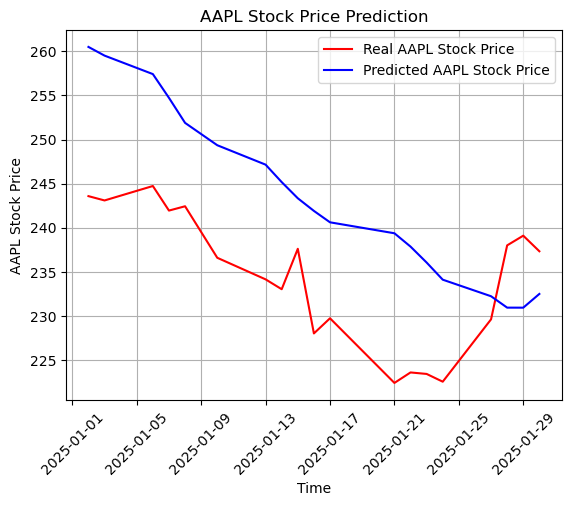

In [36]:
plt.plot(dataset_test[:19], color = 'red', label = 'Real AAPL Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows=None
pd.options.display.max_columns=None

# Clustering Methods

![](https://www.tutorialandexample.com/wp-content/uploads/2019/11/An-example-of-a-cluster-system.png)

![](https://fullcircle-cms.com/fullcircle/storage/uploads/2019/07/03/5d1ca1b9199dbClustering-GIF-2.gif)

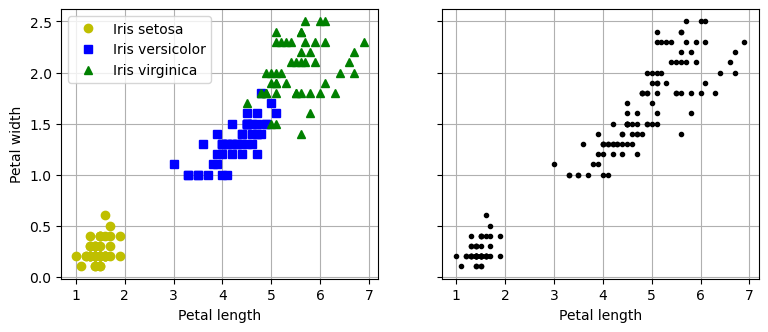

In [38]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

A Gaussian Mixture Model (GMM) assumes that the data is generated from a mixture of multiple Gaussian distributions (bell-shaped probability distributions). Instead of assigning data points to a single cluster with hard boundaries (like K-Means), GMM assigns a probability (soft assignment) to each data point for belonging to a cluster.

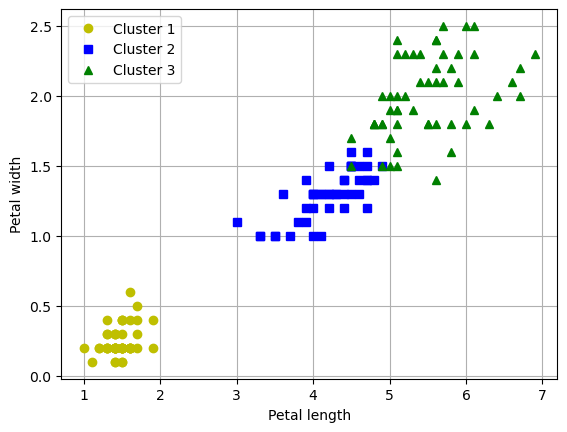

In [39]:
import numpy as np
from scipy import stats
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

mapping = {}
for cluster_id in np.unique(y_pred):
    most_common_class_id, _ = stats.mode(y[y_pred==cluster_id])
    mapping[cluster_id] = most_common_class_id

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [41]:
(y_pred==y).sum() / len(y_pred)

np.float64(0.9666666666666667)

**Clustering is used in a wide variety of applications**, including:

- Customer segmentation
    - You can cluster your customers based on their purchases and their activity on your website. This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment. For example, customer segmentation can be useful in recommender systems to suggest content that other users in the same cluster enjoyed.

- Data analysis
    - When you analyze a new dataset, it can be helpful to run a clustering algorithm, and then analyze each cluster separately.

- Dimensionality reduction
    - Once a dataset has been clustered, it is usually possible to measure each instance’s affinity with each cluster; affinity is any measure of how well an instance fits into a cluster. Each instance’s feature vector x can then be replaced with the vector of its cluster affinities. If there are k clusters, then this vector is k-dimensional. The new vector is typically much lower-dimensional than the original feature vector, but it can preserve enough information for further processing.

- Feature engineering
    - The cluster affinities can often be useful as extra features. For example, we used k-means in Chapter 2 to add geographic cluster affinity features to the California housing dataset, and they helped us get better performance.

- Anomaly detection (also called outlier detection)
    - Any instance that has a low affinity to all the clusters is likely to be an anomaly. For example, if you have clustered the users of your website based on their behavior, you can detect users with unusual behavior, such as an unusual number of requests per second.

- Semi-supervised learning
    - If you only have a few labels, you could perform clustering and propagate the labels to all the instances in the same cluster. This technique can greatly increase the number of labels available for a subsequent supervised learning algorithm, and thus improve its performance.

- Search engines
    - Some search engines let you search for images that are similar to a reference image. To build such a system, you would first apply a clustering algorithm to all the images in your database; similar images would end up in the same cluster. Then when a user provides a reference image, all you’d need to do is use the trained clustering model to find this image’s cluster, and you could then simply return all the images from this cluster.

- Image segmentation
    - By clustering pixels according to their color, then replacing each pixel’s color with the mean color of its cluster, it is possible to considerably reduce the number of different colors in an image. Image segmentation is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.

## k-Means clustering

### The algorithm
* The model training process
![](https://stanford.edu/~cpiech/cs221/img/kmeansViz.png)

* Pseudo code:
![](https://stanford.edu/~cpiech/cs221/img/kmeansMath.png)

* The model training process (dynamic demonstration)
![](https://miro.medium.com/max/1280/1*rwYaxuY-jeiVXH0fyqC_oA.gif)

### Fit and predict

* Reference on function `make_blobs`: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [42]:
## generate some sample data

from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=123)

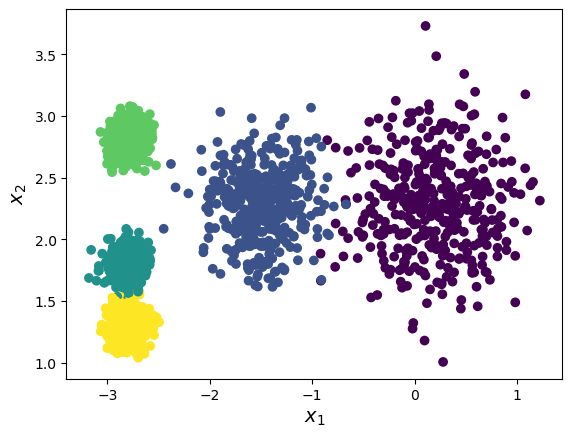

In [43]:
## plot the sample data

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

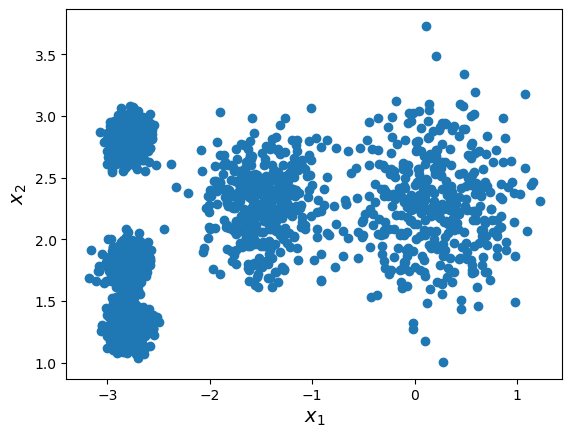

In [44]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

In [45]:
## Fit a K-Means clustering model

from sklearn.cluster import KMeans


k = 5
kmeans = KMeans(n_clusters=k, random_state=123)
# kmenas.fit(X)
# y_pred = kmeans.predict(X)
y_pred = kmeans.fit_predict(X)

In [46]:
kmeans.labels_

array([1, 3, 2, ..., 2, 2, 2], shape=(2000,), dtype=int32)

In [48]:
set(kmeans.labels_)

{np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4)}

In [49]:
kmeans.cluster_centers_

array([[-2.7979204 ,  2.80239567],
       [-0.10450921,  2.36430934],
       [-2.80100569,  1.55923795],
       [-1.47500483,  2.28212281],
       [ 0.53323641,  2.21720054]])

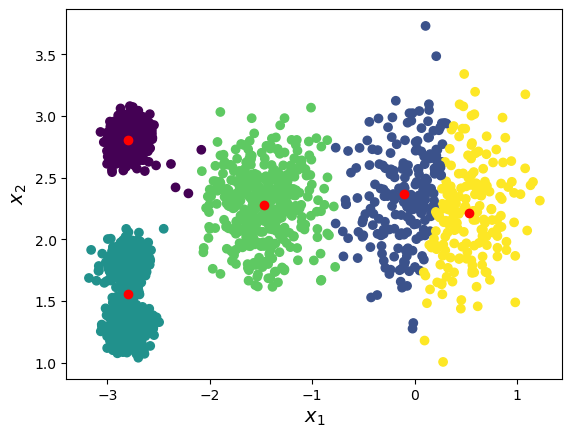

In [50]:
## plot the estimated centroids with the raw data

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r')
    
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

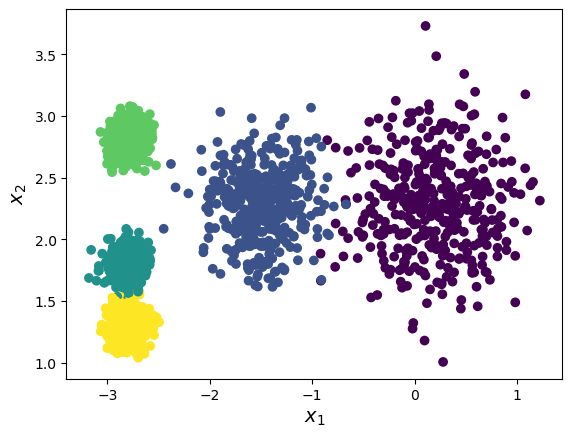

In [51]:
## plot the sample data

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

In [52]:
## predict labels of new instances

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 4, 0, 0], dtype=int32)

In [53]:
kmeans.transform(X_new)

array([[2.91070393, 0.37900326, 2.83547246, 1.50174317, 0.57577526],
       [5.85318031, 3.12581169, 5.8177262 , 4.48388911, 2.47630747],
       [0.28263694, 2.96445096, 1.45443942, 1.68551414, 3.61891345],
       [0.36370222, 2.89866846, 0.96157785, 1.54048068, 3.54453595]])

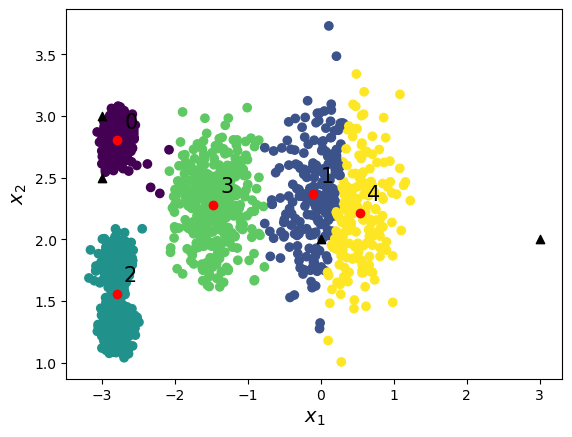

In [54]:
## visualize the new data points

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r')
plt.scatter(X_new[:,0], X_new[:,1], marker='^', c='k')


#### label the clusters
centers = kmeans.cluster_centers_
labels = kmeans.predict(centers)
for i in range(5):
    plt.text(centers[i][0]+0.1, centers[i][1]+0.1, labels[i], fontsize=15)

plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

### The decision boundaries (the `voronoi diagram`)

In [55]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=2,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

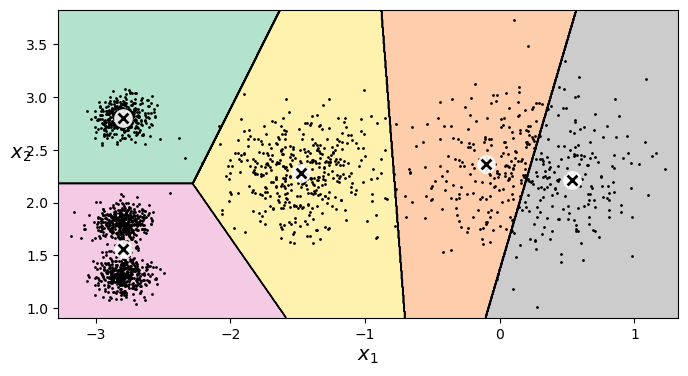

In [56]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

### The algorithm demonstration

* Initialize the centroids randomly

In [57]:
## run the kmeans algorithm 1, 2, and 3 iterations, see how the centroids move around

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=1, random_state=123)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=2, random_state=123)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=3, random_state=123)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=123)

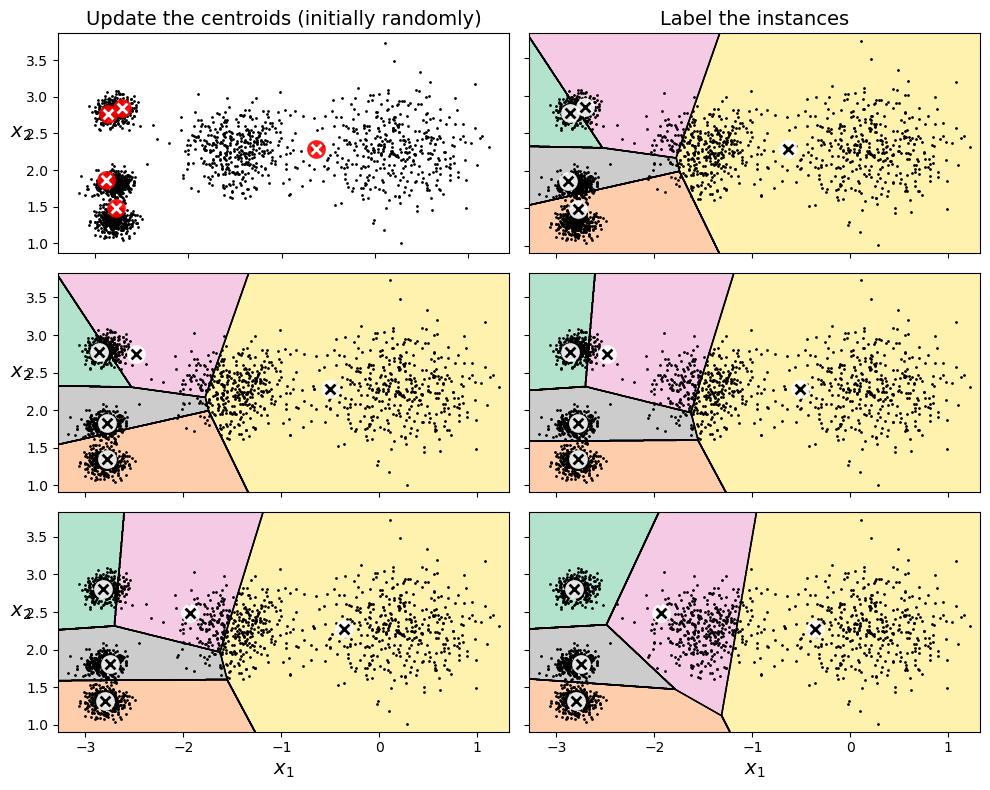

In [58]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.tight_layout()
plt.show()

* Depending on the centroids initialization, the model might converge to different solutions (different local optimums)

In [59]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

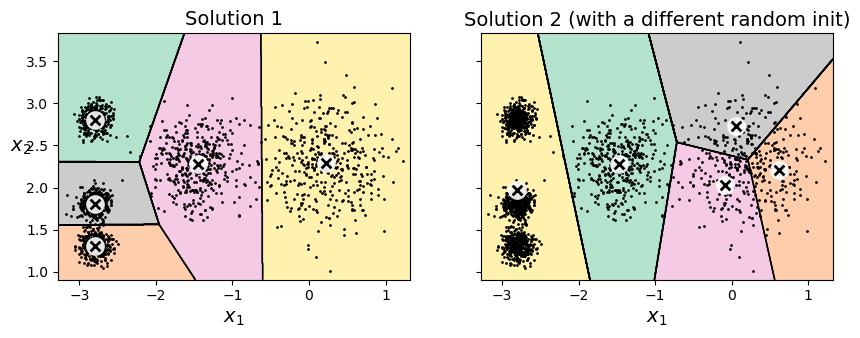

In [60]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=123)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=1)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

* Random number generator and seed

In [ ]:
np.random.randint(low=0, high=3, size=5)

### Inertia

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the `inertia` metric: **sum of the squared distances between each training instance and its closest centroid**.

In [61]:
from sklearn.cluster import KMeans


k = 5
kmeans = KMeans(n_clusters=k, random_state=123)
kmeans.fit(X)
kmeans.inertia_

220.0898611212719

In [62]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=123)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=1)

kmeans_rnd_init1.fit(X)
kmeans_rnd_init2.fit(X)

kmeans_rnd_init1.inertia_, kmeans_rnd_init2.inertia_

(210.3191547116946, 606.6251155359678)

In [63]:
kmeans.score(X) # the negative inertia

-220.08986112127187

In [66]:
## multiple randomization

k = 5
kmeans_10 = KMeans(n_clusters=k, n_init=10)
kmeans_10.fit(X)
kmeans_10.inertia_

210.32300959028464

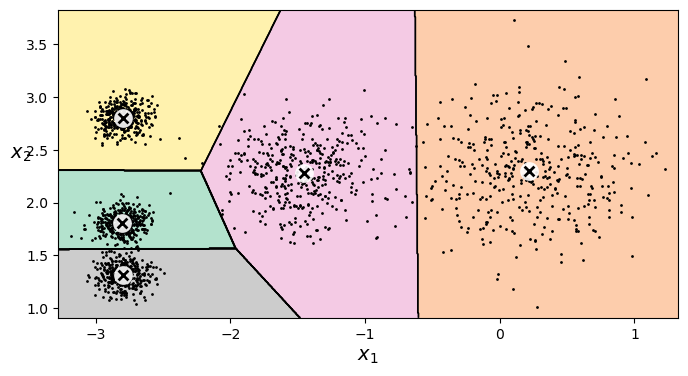

In [67]:
## visualize the best model

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_10, X)
plt.show()

In [69]:
k = 5
kmeans = KMeans(n_clusters=k, init='random')
kmeans.fit(X)
kmeans.inertia_

210.31915471169458

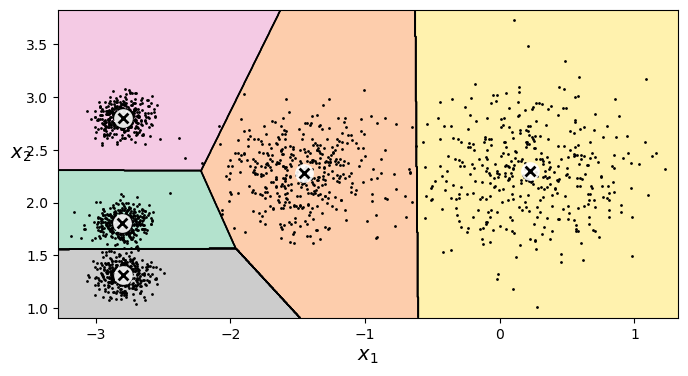

In [70]:
## visualize the best model

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [71]:
## manually assign initial centroids

good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans_m = KMeans(n_clusters=5, init=good_init, n_init=1)
kmeans_m.fit(X)
kmeans_m.inertia_

210.3191547116946

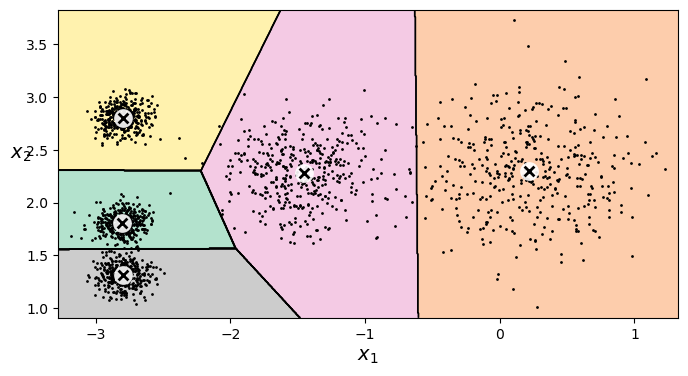

In [72]:
## visualize the best model

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_10, X)
plt.show()

### Find the optimal number of clusters - the "elbow" plot

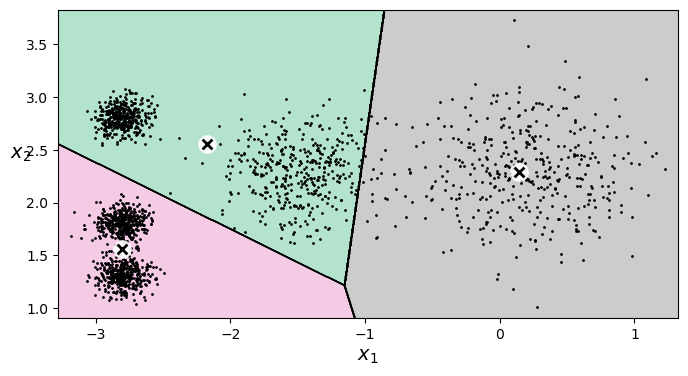

In [73]:
## visualize k = 3
kmeans_3 = KMeans(n_clusters=3)
kmeans_3.fit(X)


plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_3, X)
plt.show()

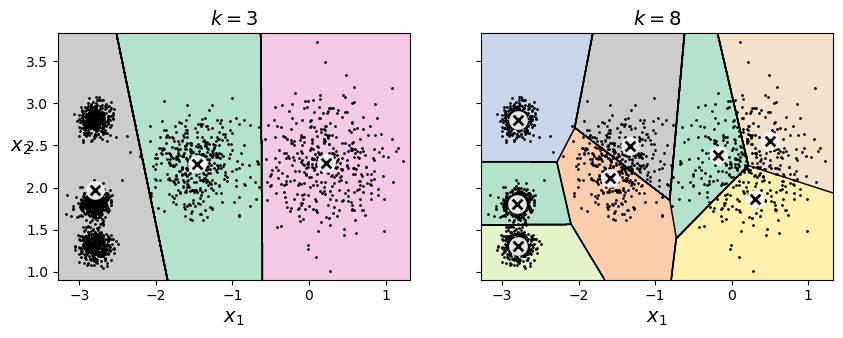

In [74]:
kmeans_k3 = KMeans(n_clusters=3)
kmeans_k8 = KMeans(n_clusters=8)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

In [75]:
kmeans_k3.inertia_

674.6315077044649

In [76]:
kmeans_k8.inertia_

124.09665158611139

In [77]:
## try different k values

kmeans_per_k = [KMeans(n_clusters=k).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

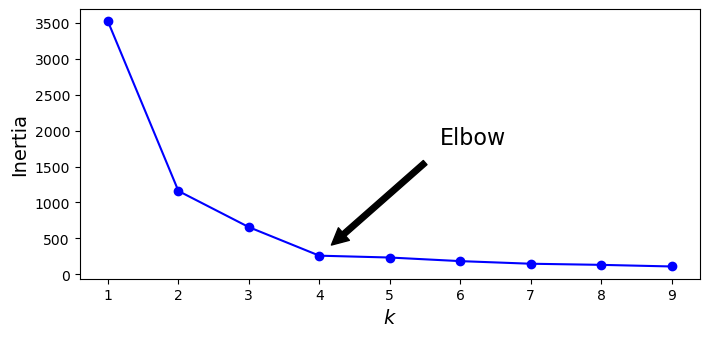

In [78]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
# plt.ylim(0, 1300)
plt.show()

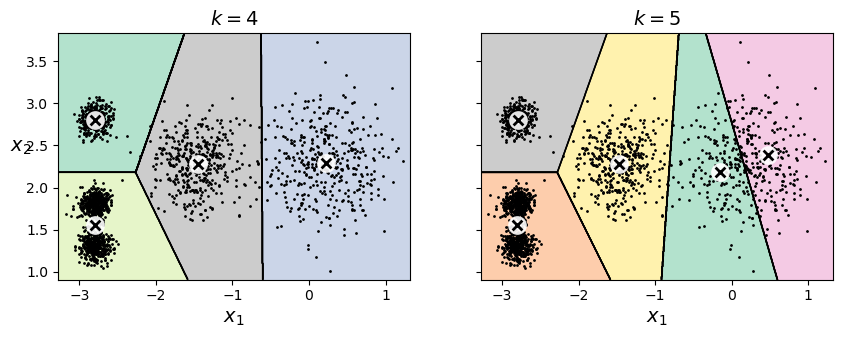

In [79]:
kmeans_k4 = KMeans(n_clusters=4)
kmeans_k5 = KMeans(n_clusters=5)

plot_clusterer_comparison(kmeans_k4, kmeans_k5, X, "$k=4$", "$k=5$")
plt.show()

In [80]:
kmeans_k4.inertia_, kmeans_k5.inertia_

(260.082430378158, 220.4957967836547)

As you can see, there is an elbow at $k=4$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So $k=4$ is a pretty good choice. Of course in this example it is not perfect since it means that the two blobs in the lower left will be considered as just a single cluster, but it's a pretty good clustering nonetheless.

In [ ]:
plot_decision_boundaries(kmeans_per_k[3], X)
plt.show()

### Find the optimal number of clusters - the `silhouette score`

The `silhouette score`, which is the mean silhouette coefficient over all the instances. An instance's silhouette coefficient is equal to $\frac{(b - a)}{\max(a, b)}$ where $a$ is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and $b$ is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

![](https://www.researchgate.net/profile/Frans_Coenen/publication/221570710/figure/fig1/AS:670029003644935@1536758771429/Derivation-of-the-Overall-Silhouette-Coefficient-OverallSil.png)

In [81]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

np.float64(0.657769958414177)

In [82]:
kmeans.get_params

<bound method BaseEstimator.get_params of KMeans(init='random', n_clusters=5)>

In [83]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

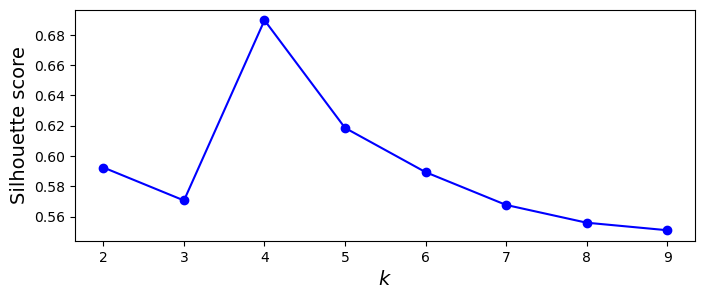

In [84]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

**It confirms that $k=4$ is a very good choice, and it also underlines the fact that $k=5$ is quite good as well, and much better than $k=6$ or $7$.**

## Limit of K-Means model

* Multiple run is needed to avoid suboptimal solutions
* Need to feed in a fixed `k` value
* Doesn't work well when clusters have varying sizes, different densities, or nonspherical shapes
    * It is important to scale the input features before you run the K-Means

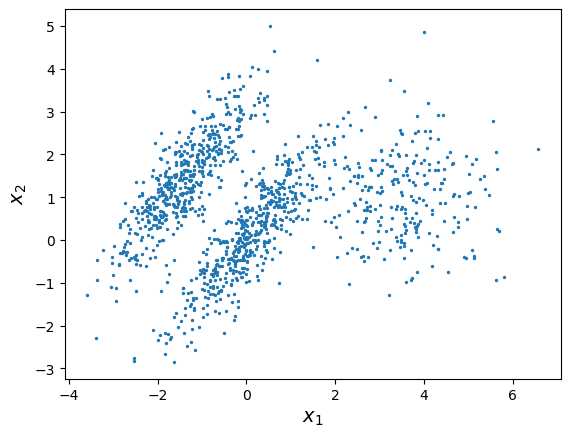

In [85]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plt.scatter(X[:,0], X[:,1], s=2)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

In [86]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=123)
kmeans_bad = KMeans(n_clusters=3, random_state=123)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=123)

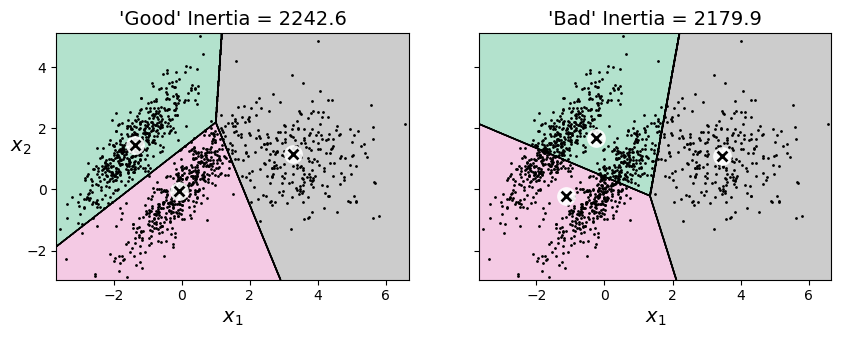

In [87]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("'Good' Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("'Bad' Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

`Gaussian mixture models` works better in this case
* Reference: https://scikit-learn.org/stable/modules/mixture.html

# Work with Imbalanced Data

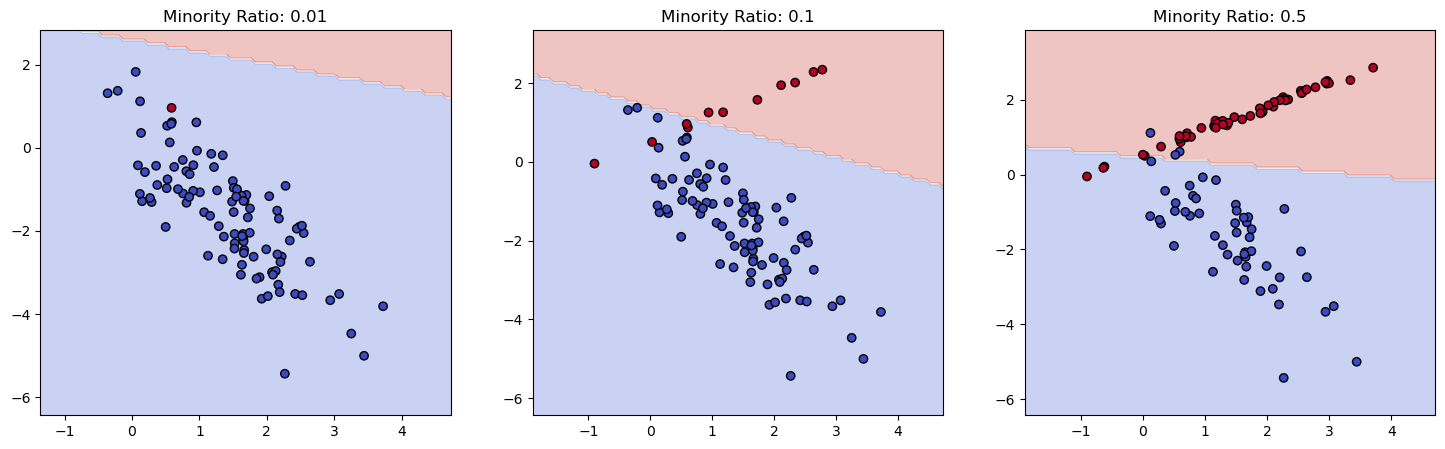

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Function to plot decision boundaries
def plot_decision_boundaries(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

inputs_to_visualize = []

for minority_ratio in [0.01, 0.1, 0.5]:
    # Generate an imbalanced dataset
    X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_clusters_per_class=1,
                               weights=[1 - minority_ratio, minority_ratio], class_sep=1.5, random_state=42)
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Fit a logistic regression model
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train, y_train)
    # Store the input data for visualization
    inputs_to_visualize.append((minority_ratio, model, X_test, y_test))

# visualize all in a 1x3 grid
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (minority_ratio, model, X_test, y_test) in enumerate(inputs_to_visualize):
    plot_decision_boundaries(model, X_test, y_test, axes[i], f"Minority Ratio: {minority_ratio}")
plt.show()


# Model Evaluation on Imbalanced Dataset

## ROC-AUC

In [ ]:
# example of a roc curve for a predictive model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
lr = LogisticRegression(solver='lbfgs')
lr.fit(trainX, trainy)
# predict probabilities
yhat = lr.predict_proba(testX)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for the model
fpr, tpr, thresholds = roc_curve(testy, pos_probs)
roc_auc_lr = roc_auc_score(testy, pos_probs)
# plot lr roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.title(f'ROC curve for Logistic Regression Model. AUC = {roc_auc_lr:.2f}')
plt.show()

In [ ]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier(strategy='stratified')
dc.fit(trainX, trainy)
yhat_dummy = dc.predict_proba(testX)
pos_probs_dummy = yhat_dummy[:, 1]
# calculate roc auc
roc_auc_dummy = roc_auc_score(testy, pos_probs_dummy)
print(f'ROC AUC = {roc_auc_dummy:.2f}')

In [ ]:
pos_probs_dummy = yhat_dummy[:, 1]

plt.hist(pos_probs_dummy, bins=10, label='Positive Class Distribution', density=True)
plt.legend()
plt.show()

In [ ]:
pos_probs = yhat[:, 1]
neg_probs = yhat[:, 0]

plt.hist(pos_probs, bins=100, label='Positive Class Distribution', density=True)
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Threshold = 0.5')
plt.legend()
plt.show()

In [ ]:
np.sum(pos_probs>=0.5), np.sum(pos_probs<0.5)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


|               | Negative Prediction | Positive Prediction |
|--------------|--------------------|--------------------|
| **Negative Class** | True Negative (TN)  | False Positive (FP) |
| **Positive Class** | False Negative (FN) | True Positive (TP) |

In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(testy, lr.predict(testX))
print(matrix)

## PR-AUC

In [ ]:
from sklearn.metrics import precision_recall_curve

# predict probabilities
yhat = lr.predict_proba(testX)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(testy, pos_probs)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
from sklearn.metrics import auc

auc_score = auc(recall, precision)
print('PR AUC: %.3f' % auc_score)

In [ ]:


precision_dummy, recall_dummy, _ = precision_recall_curve(testy, pos_probs_dummy)
auc_score = auc(recall_dummy, precision_dummy)
print('PR AUC: %.3f' % auc_score)

## Severly Imbalanced Data

### ROC-AUC

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
 
# plot no skill and model roc curves
def plot_roc_curve(test_y, naive_probs, model_probs):
	# plot naive skill roc curve
	fpr, tpr, _ = roc_curve(test_y, naive_probs)
	plt.plot(fpr, tpr, linestyle='--', label='No Skill')
	# plot model roc curve
	fpr, tpr, _ = roc_curve(test_y, model_probs)
	plt.plot(fpr, tpr, marker='.', label='Logistic')
	# axis labels
	plt.xlabel('False Positive Rate')
	plt.ylabel('True Positive Rate')
	# show the legend
	plt.legend()
	# show the plot
	plt.show()
 
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)
# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# no skill model, stratified random class predictions
dc = DummyClassifier(strategy='stratified')
dc.fit(trainX, trainy)
yhat_dc = dc.predict_proba(testX)
naive_probs = yhat_dc[:, 1]
# calculate roc auc
roc_auc_dc = roc_auc_score(testy, naive_probs)
print('No Skill ROC AUC %.3f' % roc_auc_dc)
# skilled model
lr = LogisticRegression(solver='lbfgs')
lr.fit(trainX, trainy)
yhat = lr.predict_proba(testX)
lr_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(testy, lr_probs)
print('Logistic ROC AUC %.3f' % roc_auc)
# plot roc curves
plot_roc_curve(testy, naive_probs, lr_probs)

### PR-AUC

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
 
# plot no skill and model precision-recall curves
def plot_pr_curve(test_y, model_probs):
	# calculate the no skill line as the proportion of the positive class
	no_skill = len(test_y[test_y==1]) / len(test_y)
	# plot the no skill precision-recall curve
	plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
	# plot model precision-recall curve
	precision, recall, _ = precision_recall_curve(testy, model_probs)
	plt.plot(recall, precision, marker='.', label='Logistic')
	# axis labels
	plt.xlabel('Recall')
	plt.ylabel('Precision')
	# show the legend
	plt.legend()
	# show the plot
	plt.show()
 
naive_probs = yhat_dc[:, 1]
# calculate the precision-recall auc
precision_dc, recall_dc, _ = precision_recall_curve(testy, naive_probs)
auc_score_dc = auc(recall_dc, precision_dc)
print('No Skill PR AUC: %.3f' % auc_score_dc)

model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision_lr, recall_lr, _ = precision_recall_curve(testy, model_probs)
auc_score_lr = auc(recall_lr, precision_lr)
print('Logistic PR AUC: %.3f' % auc_score_lr)
# plot precision-recall curves
plot_pr_curve(testy, model_probs)

To explain why the ROC and PR curves tell a different story, recall that the PR curve focuses on the minority class, whereas the ROC curve covers both classes.

In [ ]:
pos_probs = yhat[:, 1]
plt.hist(pos_probs, bins=100)
plt.show()